# Video Game Sales Data Analysis - Team Ivysaur
## Members:
### Mert Uyğur, Umut Can Demirkaynak, Muhammed Murat Göktaş

***

## Importing necessary libraries and data

In [1]:
import sys
sys.path.append('../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from vgs.config import vgsales

 ***

## Overview and Some Data Cleaning 

In [2]:
vgsales.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

#### Dropping Rank columns which serves nothing

In [3]:
vgsales.drop(columns="Rank",inplace=True)

In [4]:
vgsales.isnull().values.any()

True

#### Detecting how many missing values and which

In [5]:
null_columns = vgsales.columns[vgsales.isnull().any()]
vgsales[null_columns].isnull().sum()

Year         271
Publisher     58
dtype: int64

 #### Dropping null values since it is not much and will not effect our 

In [6]:
vgsales = vgsales.dropna()

In [7]:
vgsales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### There was an incomplete value of game in 2020 distracting our dataset, we removed values after year 2017.

In [8]:
vgsales = vgsales[vgsales["Year"]<2017.0]

In [9]:
vgsales.shape

(16287, 10)

 ***
# Explotary Data Analysis

***

### Platforms

#### How many different platforms?

In [10]:
vgsales['Platform'].nunique()

31

#### The amount of games the platforms released between 1980-2016 

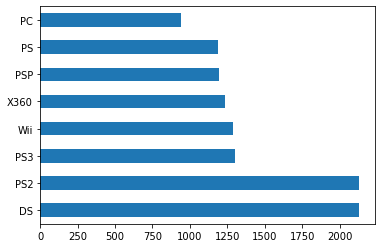

In [11]:
vgsales['Platform'].value_counts()[:8].plot(kind="barh");

<img src="files/ds.jpg">

#### Platforms that have the most global sales amount also by region

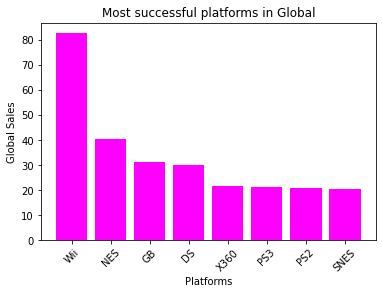

In [12]:
plt.bar(data=vgsales.head(20), x='Platform', height='Global_Sales', color = 'magenta')
plt.xticks(rotation=45)
plt.xlabel('Platforms')
plt.ylabel('Global Sales')
plt.title('Most successful platforms in Global')
plt.show()

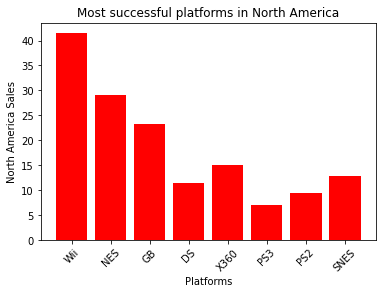

In [13]:
plt.bar(data=vgsales.head(20), x='Platform', height='NA_Sales', color = 'red')
plt.xticks(rotation=45)
plt.xlabel('Platforms')
plt.ylabel('North America Sales')
plt.title('Most successful platforms in North America')
plt.show()

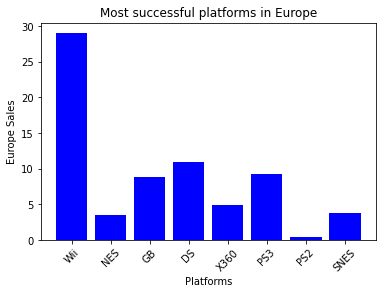

In [14]:
plt.bar(data=vgsales.head(20), x='Platform', height='EU_Sales', color = 'blue')
plt.xticks(rotation=45)
plt.xlabel('Platforms')
plt.ylabel('Europe Sales')
plt.title('Most successful platforms in Europe')
plt.show()

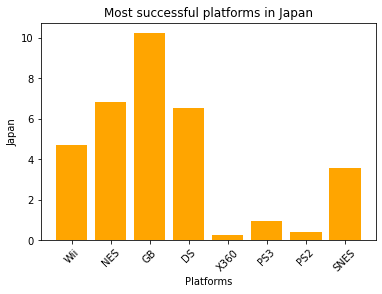

In [15]:
plt.bar(data=vgsales.head(20), x='Platform', height='JP_Sales', color = 'orange')
plt.xticks(rotation=45)
plt.xlabel('Platforms')
plt.ylabel('Japan')
plt.title('Most successful platforms in Japan')
plt.show()

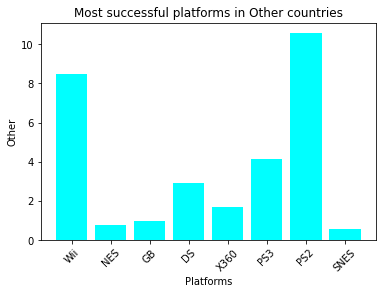

In [16]:
plt.bar(data=vgsales.head(20), x='Platform', height='Other_Sales', color = 'cyan')
plt.xticks(rotation=45)
plt.xlabel('Platforms')
plt.ylabel('Other')
plt.title('Most successful platforms in Other countries')
plt.show()

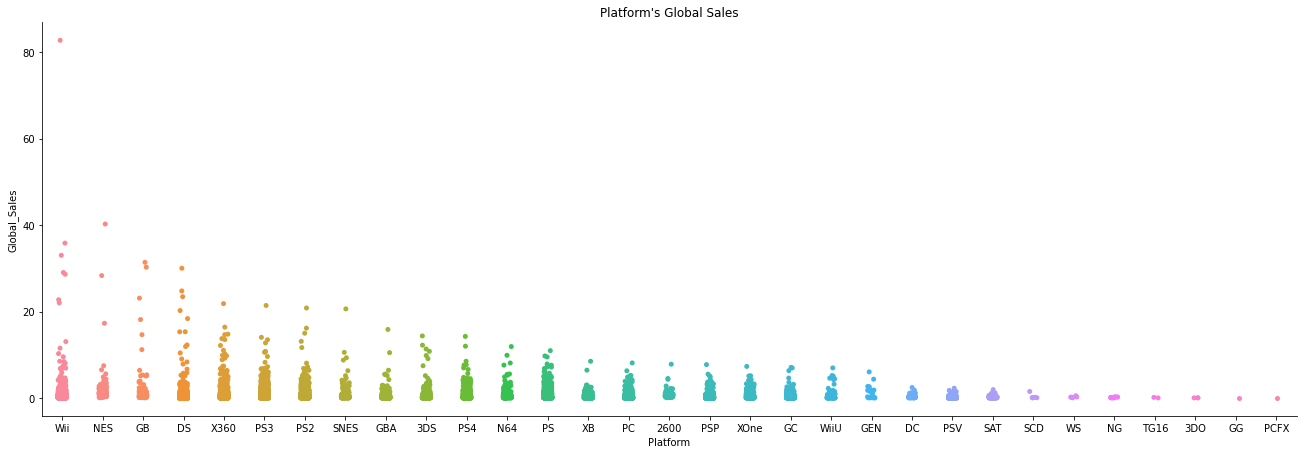

In [17]:
sns.catplot(x='Platform', y='Global_Sales', data=vgsales, height=6, aspect=3)
plt.gca().set_title('Platform\'s Global Sales');

### Publishers

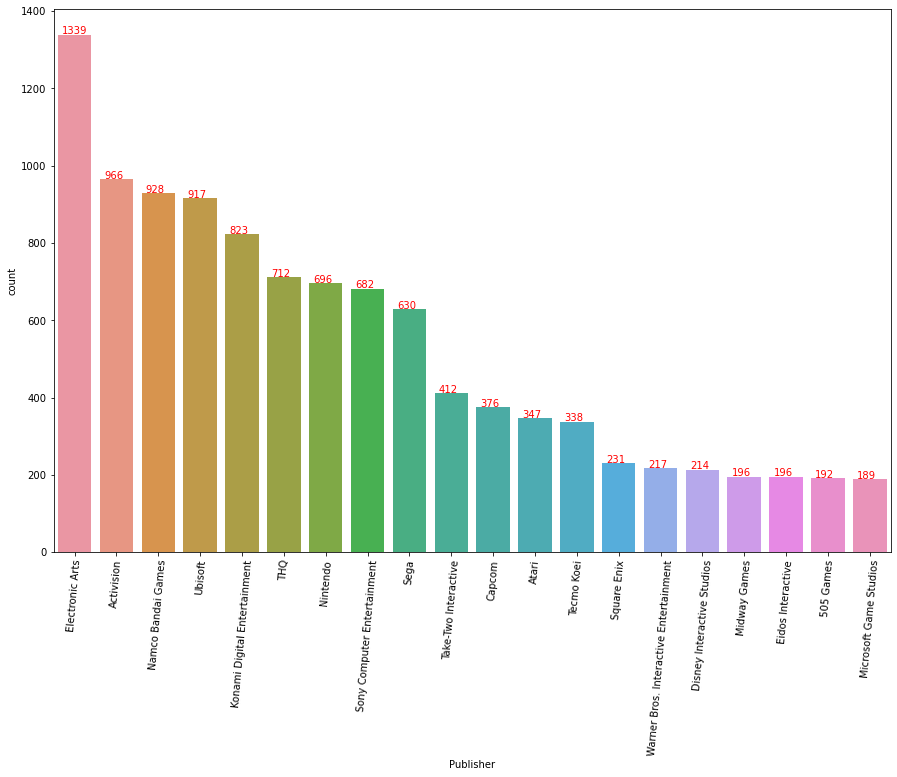

In [18]:
publishers = vgsales.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
publishers = pd.DataFrame(publishers).reset_index()
plt.figure(figsize=(15, 10))
ax=sns.countplot(x="Publisher", data=vgsales, order = vgsales.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=85)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.10, p.get_height()+1),color= 'red')

### Games

In [19]:
vgsales['Name'].nunique()

11322

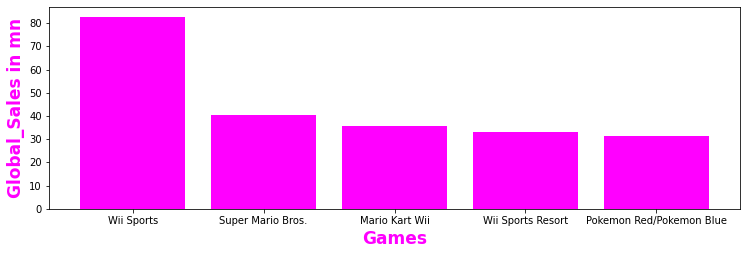

In [20]:
height = vgsales['Global_Sales'][:5]
bars = vgsales['Name'][:5]
plt.bar(bars, height, color='magenta')
plt.subplots_adjust(left=-0.7, bottom=0.1, right=0.9, top=0.8)
# Custom Axis title
plt.xlabel('Games', fontweight='bold', color = 'magenta', fontsize='17', horizontalalignment='center');
plt.ylabel('Global_Sales in mn', fontweight='bold', color='magenta', fontsize='17');

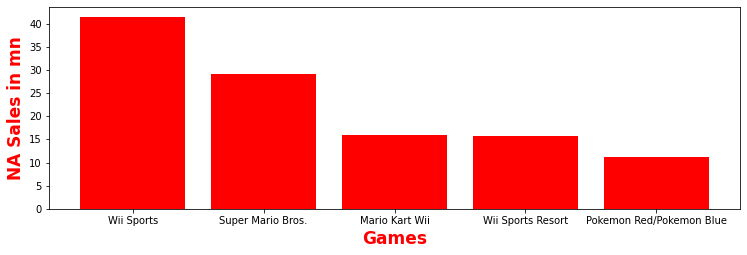

In [21]:
height = vgsales['NA_Sales'][:5]
bars = vgsales['Name'][:5]
plt.bar(bars, height, color='red')
plt.subplots_adjust(left=-0.7, bottom=0.1, right=0.9, top=0.8)
# Custom Axis title
plt.xlabel('Games', fontweight='bold', color = 'red', fontsize='17', horizontalalignment='center');
plt.ylabel('NA Sales in mn', fontweight='bold', color='red', fontsize='17');

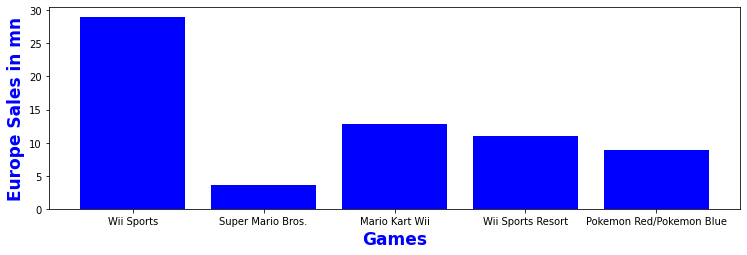

In [22]:
height = vgsales['EU_Sales'][:5]
bars = vgsales['Name'][:5]
plt.bar(bars, height, color='blue')
plt.subplots_adjust(left=-0.7, bottom=0.1, right=0.9, top=0.8)
# Custom Axis title
plt.xlabel('Games', fontweight='bold', color = 'blue', fontsize='17', horizontalalignment='center');
plt.ylabel('Europe Sales in mn', fontweight='bold', color='blue', fontsize='17');

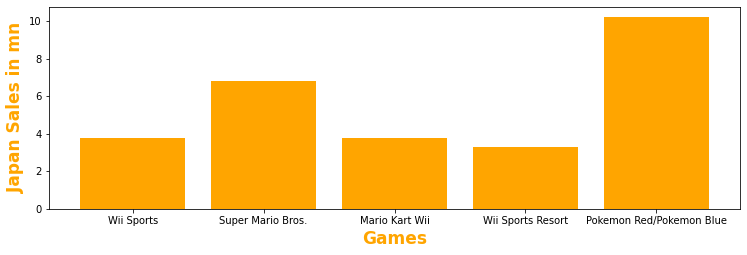

In [23]:
height = vgsales['JP_Sales'][:5]
bars = vgsales['Name'][:5]
plt.bar(bars, height, color='orange')
plt.subplots_adjust(left=-0.7, bottom=0.1, right=0.9, top=0.8)
# Custom Axis title
plt.xlabel('Games', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center');
plt.ylabel('Japan Sales in mn', fontweight='bold', color='orange', fontsize='17');

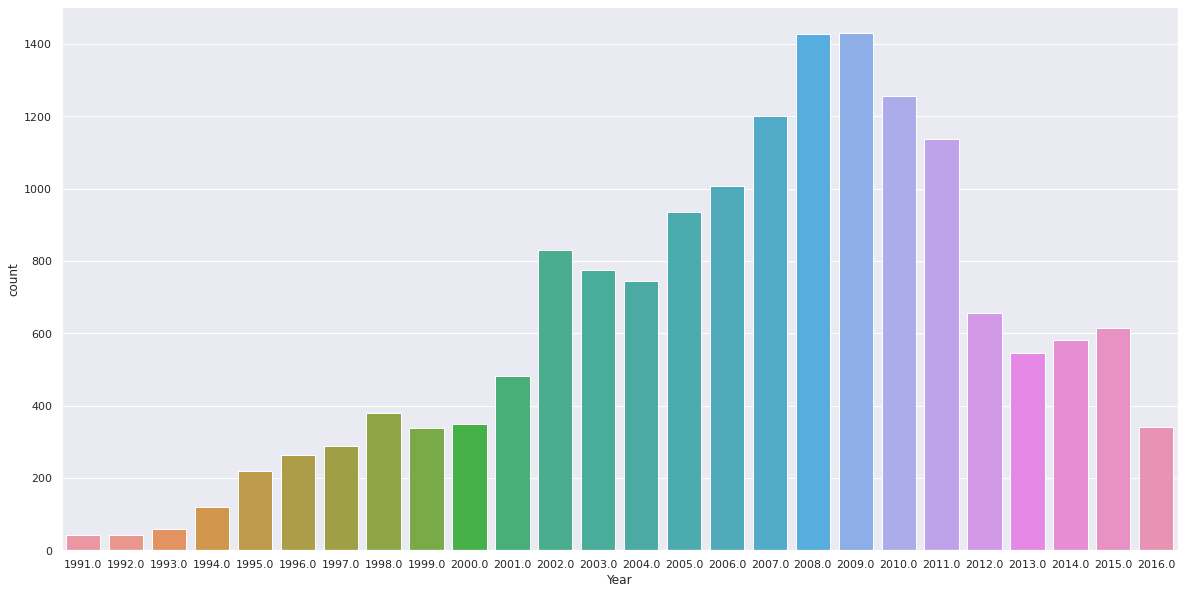

In [31]:
data_thrty = vgsales[vgsales.Year >1990]

# We will be inspecting the games released after 1990 in this dataset.
sns.set(rc={"font.style":"normal",
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':20,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':20,
            'ytick.labelsize':30})

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Year", data=data_thrty)

### Genre

#### Global sales per Genre

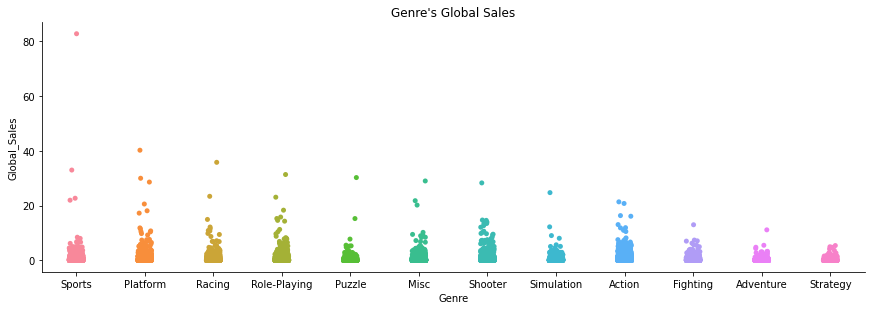

In [24]:
sns.catplot(x='Genre', y='Global_Sales', data=vgsales, height=4, aspect=3)
plt.gca().set_title('Genre\'s Global Sales');

In [25]:
vgsales[vgsales['Global_Sales']>40]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


#### Amount of games filtered by genre

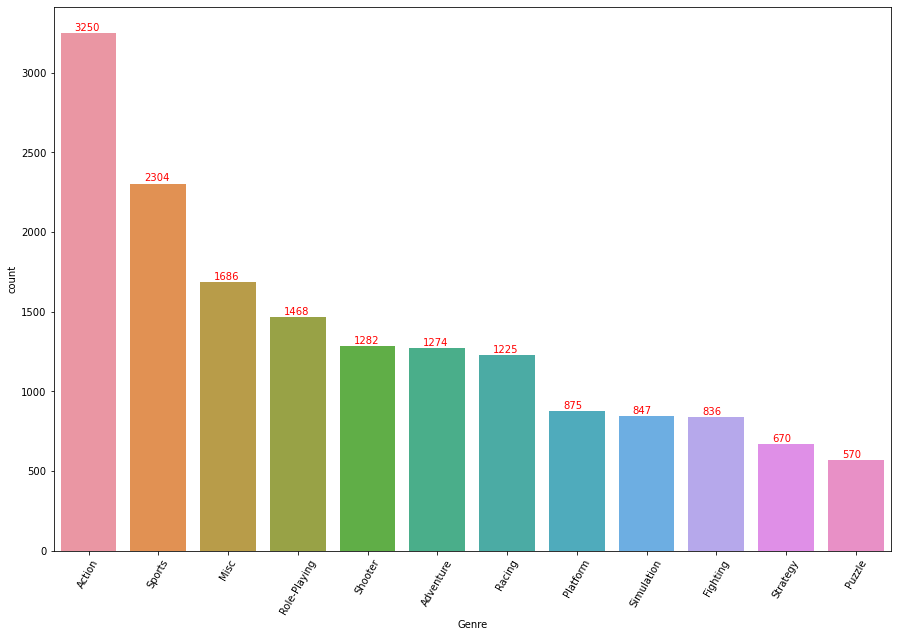

In [26]:
plt.figure(figsize=(15, 10))
ax=sns.countplot(x="Genre", data=vgsales, order = vgsales['Genre'].value_counts().index)
plt.xticks(rotation=60)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.20, p.get_height()+2), va='bottom',color= 'red')
plt.show();

#### Amoung of games showed as graphics and percentages

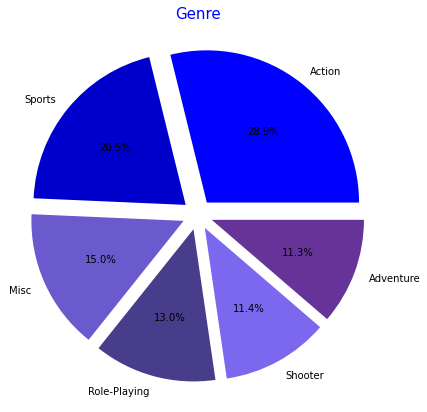

In [27]:
x=vgsales.Genre.value_counts()[0:6]
sizes=x.values
labels=x.index
explode=[0,0,0,0,0,0]
colors=["blue","mediumblue","slateblue","darkslateblue","mediumslateblue","rebeccapurple"]
plt.figure(figsize=(7,7))
plt.pie(sizes,explode=[0.1]*6,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Genre',color = 'blue',fontsize = 15);

### Publisher

### Year

In [28]:
vgsales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [30]:
##Sales

data=pd.concat([sorted_data,sorted_data2["NA_Sales"]],axis=1)
data.sort_values("JP_Sales",inplace=True)
f,ax1=plt.subplots(figsize=(15,10))
sns.pointplot(x='platform list',y='JP_Sales',data=data,color='lime',alpha=0.8)
sns.pointplot(x='platform list',y='NA_Sales',data=data,color='red',alpha=0.8)
plt.text(40,0.6,'Na Sales',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'JP Sales',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('Platfotm',fontsize = 15,color='blue')
plt.ylabel('Sales',fontsize = 15,color='blue')
plt.title('JP sales VS  NA Sales',fontsize = 20,color='blue')
plt.grid()

NameError: name 'sorted_data' is not defined

In [ ]:
sns.catplot(x='Platform', y='Global_Sales', data=data2, height=4, aspect=3)
g = plt.gca()
g.set_title('Global Sales per Platform')

In [ ]:
data2 = data2.set_index(data2['year']);

sns.catplot(x='Genre', y='Global_Sales', data=data2, height=4, aspect=3)
g = plt.gca()
g.set_title('Global Sales per Genre')

In [ ]:
#Market Share Publishers 

All_Sales = dataset["Global_Sales"].sum()
Sales_Nintendo = dataset[dataset["Publisher"] == "Nintendo"]["Global_Sales"].sum() 
Sales_Nintendo = (Sales_Nintendo / All_Sales) * 100
Sales_Electronic_Arts = dataset[dataset["Publisher"] == "Electronic Arts"]["Global_Sales"].sum() * 100 / All_Sales
Sales_Activision = dataset[dataset["Publisher"] == "Activision"]["Global_Sales"].sum() * 100 / All_Sales
Sales_Sony = dataset[dataset["Publisher"] == "Sony Computer Entertainment"]["Global_Sales"].sum() * 100 / All_Sales
Sales_Ubisoft = dataset[dataset["Publisher"] == "Ubisoft"]["Global_Sales"].sum() * 100 / All_Sales
Market_Plot = [Sales_Nintendo, Sales_Electronic_Arts, Sales_Activision, Sales_Sony, Sales_Ubisoft]
plt.pie(Market_Plot, labels=['Nintendo: 20%', 'Electronic Arts: 12,4%', 'Activision: 8%', 'Sony: 7%', 'Ubisoft: 5%'])
plt.title("Market share among the 5 best publishers")
plt.show()

In [ ]:
#Global Sales Evolution 

Global_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'Global_Sales',aggfunc = np.sum)
sns.lineplot(Global_Sales_Evolution.index, Global_Sales_Evolution['Global_Sales'])

#EU Sales Evolution 

EU_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'EU_Sales',aggfunc = np.sum)
sns.lineplot(EU_Sales_Evolution.index, EU_Sales_Evolution['EU_Sales'])

#NA Sales Evolution 

NA_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'NA_Sales',aggfunc = np.sum)
sns.lineplot(NA_Sales_Evolution.index, NA_Sales_Evolution['NA_Sales'])

#JP Sales Evolution 

JP_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'JP_Sales',aggfunc = np.sum)
sns.lineplot(JP_Sales_Evolution.index, JP_Sales_Evolution['JP_Sales'])

#Other Sales Evolution 

O_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'Other_Sales',aggfunc = np.sum)
sns.lineplot(O_Sales_Evolution.index, O_Sales_Evolution['Other_Sales'])

plt.rcParams['figure.figsize'] = (10,10)
plt.legend(title='Areas', loc='upper right', labels=['Worldwide', 'Europe', 'North America', 'Japan', 'Others'])
plt.title("Evolution of Sales (all regions) from 1980 to 2020")
plt.ylabel("Sum of Sales")
plt.xlabel("Years")
plt.show()

In [ ]:
Games_Count = dataset.groupby('Platform')['Name'].agg('count')
Games_Count = Games_Count.sort_values(ascending = False)
print(Games_Count)


#Most popular genre in the dataset by Sum of Worldwide Sales

Grouped_Genre = dataset.pivot_table(values='Global_Sales',index='Genre', aggfunc='sum')
print(Grouped_Genre)
Grouped_Genre = Grouped_Genre.sort_values(by = 'Global_Sales',ascending  = False)

# Plot the data  
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(Grouped_Genre['Global_Sales'],Grouped_Genre.index, orient='h')
plt.title("Most sold genre games in terms of Global sales")
plt.ylabel("Genres")
plt.xlabel("Sales")
plt.show()

In [ ]:
var5 = data["Name"].value_counts().head(30)
The grap show us average global sales in top 30 video games
discount = []
the_games_list = [i for i in var5.index]

for i in the_games_list:
    x = data[data["Name"]==i]
    discount.append(sum(x.Global_Sales)/len(x))
    
#sorting to be shown more tidy in graph
data2 = pd.DataFrame({"Name":the_games_list,"Global_Sales":discount})
new_index = (data2["Global_Sales"].sort_values(ascending=True)).index.values
sorted_data = data2.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['Name'], y=sorted_data['Global_Sales'])
plt.xticks(rotation=90)
plt.xlabel('Video Games')
plt.ylabel('Avarage Global Sales')
plt.title('The Games with Global Sales')
plt.grid()

In [ ]:
var3 = data["Publisher"].value_counts().head(20)
Average sales for top 20 publisher###
publisher_list = [i for i in var3.index]
na_sales = []
eu_sales = []
jp_sales = []
other_sales = []
global_sales = []

for i in publisher_list:
    x = data[data["Publisher"]==i] #x is dataframe
    na_sales.append(sum(x.NA_Sales)/len(x))
    eu_sales.append(sum(x.EU_Sales)/len(x))
    jp_sales.append(sum(x.JP_Sales)/len(x))
    other_sales.append(sum(x.Other_Sales)/len(x))
    global_sales.append(sum(x.Global_Sales)/len(x))

# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=na_sales,y=publisher_list,color='green',alpha = 0.8,label='Nort America' )
sns.barplot(x=eu_sales,y=publisher_list,color='red',alpha = 0.7,label='Europa')
sns.barplot(x=jp_sales,y=publisher_list,color='cyan',alpha = 0.9,label='Japonia')
sns.barplot(x=other_sales,y=publisher_list,color='yellow',alpha = 0.6,label='Other')
sns.barplot(x=global_sales,y=publisher_list,color='orange',alpha = 0.6,label='Global')


ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Regions', ylabel='Publisher'
       ,title = "Avarage of Discount's  According to Regions ")
plt.show()

In [ ]:
NUMBER OF GAMES PRODUCED IN EACH GENRE

plt.figure(figsize=(10,8))
sns.countplot("Genre", data=df)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,5))
publi = df.Publisher.value_counts().sort_values(ascending=False).iloc[0:10]
sns.barplot(publi.values, publi.index,palette=palette_pub_cubehelix,data=df)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.title('The 10 publishers with more games sold',fontsize=21);

In [ ]:
plt.figure(dpi=125)
sns.countplot(data.head(100)['Genre'])
plt.xlabel('Genre Name')
plt.xticks(rotation=60)
plt.ylabel('Count')
plt.title('Best Genre in Top 100 Video Games')
plt.show()

In [ ]:
plt.figure(dpi=125)
sns.regplot(x=data['NA_Sales'],y=data['Global_Sales'])
plt.xlabel('North America Sales')
plt.ylabel('Global Sales')
plt.title('Relationship between North America Sales and Global Sales')
plt.show()